# Retrieval Practice and Learning

What is the most effective way to learn a subject? Many students focus exclusively on the _encoding_ process---that is, how to get the knowledge into memory in the first place. For example, taking notes is an activity for encoding knowledge.

_Retrieval_, on the other hand, is the process of reconstructing that knowledge from memory. [Karpicke and Blunt](http://science.sciencemag.org/content/331/6018/772) (2011) demonstrated that _retrieval_ is more effective for learning than activites designed to promote effective encoding. They conducted an experiment in which subjects had to learn about sea otters by reading a passage. Subjects were randomly assigned to one of two conditions: some were instructed to create a [concept map](https://en.wikipedia.org/wiki/Concept_map) as they read the passage, while others were instructed to practice retrieval (i.e., read the passage, recall as much as they could, read the text again, and recall again). The two main measurements they recorded were:

1. each subject's score on a follow-up learning test one week later
2. each subject's _prediction_ of how well they would do on that test

In this lab, you will analyze data from a _replication_ of Karpicke and Blunt's experiment, conducted by Buttrick _et al_.
- The data file is here: https://dlsun.github.io/pods/data/KarpickeBlunt2011Replication/data.csv.
- The codebook (explaining what the variables mean) is here: https://dlsun.github.io/pods/data/KarpickeBlunt2011Replication/codebook.csv.

In [4]:
# READ IN THE DATA SET HEREimport numpy as np
import pandas as pd

data_dir = "https://dlsun.github.io/pods/data/"
df_learn = pd.read_csv(data_dir + "KarpickeBlunt2011Replication/data.csv")
df_learn

,ID,Age,Gender,Date.P1,Date.P2,Condition,IC.1,IC.2,Comp.1,Comp.2,...,Scorer.2.2,R2CS.avg,TS.1,Scorer.1.3,TS.2,Scorer.2.3,TS.avg,Exc.1,Exc.2,Collection
0,KB1,18,Female,11/21/16,11/28/16,Concept,1,1,1,1,...,NaN,NaN,0.36,NK,0.42,MS,0.39,0,0,1
1,KB2,18,Male,11/21/16,11/28/16,Concept,1,1,1,1,...,NaN,NaN,0.48,MS,0.36,NK,0.42,0,0,1
2,KB3,18,Male,11/21/16,11/28/16,Concept,1,1,1,1,...,NaN,NaN,0.08,NK,0.08,MS,0.08,0,0,1
3,KB4,19,Female,11/21/16,11/28/16,Concept,1,1,1,1,...,NaN,NaN,0.44,MS,0.42,NK,0.43,0,0,1
4,KB5,19,Female,11/22/16,11/29/16,Concept,1,1,1,1,...,NaN,NaN,0.26,NK,0.28,MS,0.27,0,0,1
5,KB6,19,Male,11/22/16,11/29/16,Concept,1,1,1,1,...,NaN,NaN,0.40,NK,0.46,MS,0.43,0,0,1
6,KB7,18,Male,11/22/16,12/6/16,Concept,1,1,1,1,...,NaN,NaN,0.38,MS,0.36,CB,0.37,0,0,1
7,KB8,20,Male,11/22/16,11/29/16,Concept,1,1,1,1,...,NaN,NaN,0.44,NK,0.46,MS,0.45,0,0,1
8,KB9,20,Male,11/22/16,11/28/16,Concept,1,1,1,1,...,NaN,NaN,0.64,MS,0.58,NK,0.61,0,0,1
9,KB10,20,Female,11/29/16,12/6/16,Concept,1,1,1,1,...,NaN,NaN,0.66,NK,0.70,MS,0.68,0,0,1


# Question 1

Which group felt like they learned more: the subjects who made concept maps or the ones who practiced retrieval? (Or are they about the same?) Make an appropriate visualization and explain what you see.

_Hint:_ Use the variable `PR.2`, which contains the participants' predictions of how well they would do on a test one week later.

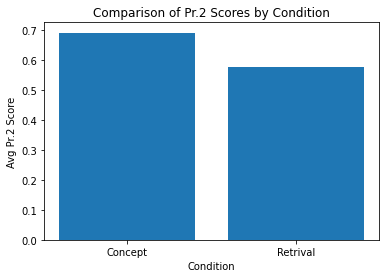

In [12]:
# YOUR CODE HERE
import matplotlib.pyplot as plt

concept_pr2_mean = df_learn[(df_learn["Condition"] == "Concept")]["PR.2"].mean()

retrieval_pr2_mean = df_learn[(df_learn["Condition"] == "Retrieval")]["PR.2"].mean()

labels = ['Concept', 'Retrival']
heights = [concept_pr2_mean, retrieval_pr2_mean]

plt.bar(labels, heights)
plt.xlabel('Condition')
plt.ylabel('Avg Pr.2 Score')
plt.title('Comparison of Pr.2 Scores by Condition')
plt.show()

**YOUR EXPLANATION HERE**

On average, Concept users believed they learned more. However, the results don't differ by too much. The average Pr.2 score difffered by less than .1. 

# Question 2

Which group actually did better on the follow-up learning test one week later? Make an appropriate visualization and explain what you see.

_Hint:_ Don't ask which variable you should use. That is for you to figure out. Read the codebook carefully (consulting the [original paper](http://science.sciencemag.org/content/331/6018/772), if necessary), make an informed decision, and explain your choice.

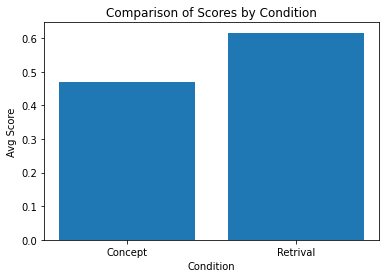

In [21]:
# YOUR CODE HERE
concept_score_mean = df_learn[(df_learn["Condition"] == "Concept")]["TS.avg"].mean()

retrieval_score_mean = df_learn[(df_learn["Condition"] == "Retrieval")]["TS.avg"].mean()

labels = ['Concept', 'Retrival']
heights = [concept_score_mean, retrieval_score_mean]

plt.bar(labels, heights)
plt.xlabel('Condition')
plt.ylabel('Avg Score')
plt.title('Comparison of Scores by Condition')
plt.show()

**YOUR EXPLANATION HERE**

The group that did better on the follow-up test one week later was the retrieval group. They scored .1 higher than Concept group.

# Question 3

How good were subjects at predicting how well they would do on the follow-up learning test? Calculate a measure of how well subjects predicted their performance and interpret the value in context. (Optionally, you may want to include a visualization as well.)

In [22]:
# YOUR CODE HERE
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(df_learn["TS.avg"], df_learn["PR.2"]))

0.2423255813953488


**YOUR EXPLANATION HERE**

To interpret whether or not the subjects acccurately predicted their scores on the follow-up learning test, we can use mean absolute error. Our calculated MAE score is .24. In this context, generally subjects were off by .24 out of a min score of 0 and a max of 1. In this case, the score is bad.

## Submission Instructions

- Copy this notebook to your own Drive, if you have not already.
- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "DATA 301 Lab 3 - YOUR NAMES HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you (and your partner for Phase 2).
- Get the link to your notebook:
  - Click on "Share" at the top-right. 
  - Change the settings to "Anyone with the link can view". 
  - Copy the sharing link into Canvas.